# Banknote Authentication Data Set

Данные были извлечены из изображений, полученных из подлинных и поддельных образцов банкнот. Изображения имели размер 400 на 400 пикселей и разрешение около 660 dpi. Для получения атрибутов была использована утилита Wavelet Transform.

### Атрибуты:
1. $\texttt{variance}$ $-$ дисперсия обработанного изображения (вещественное число)
2. $\texttt{skewness}$ $-$ асимметрия обработанного изображения (вещественное число)
3. $\texttt{curtosis}$ $-$ эксцесс обработанного изображения (вещественное число)
4. $\texttt{entropy}$  $-$ энтропия изображения (вещественное число)
5. $\texttt{class}$ $-$ класс (целое число), принимает значения 0 или 1, где 0 - подлинная банкнота, 1 - поддельная.

**Подключаем необходимые библиотеки и загружаем данные:**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('banknote.txt', sep = ',', engine = 'python')

**Называем столбцы:**

In [5]:
data.columns = ['variance','skewness','curtosis','entropy','class']

**Убеждаемся, что данные отображаются корректно:**

In [6]:
data

,variance,skewness,curtosis,entropy,class
0,4.545900,8.16740,-2.458600,-1.462100,0
1,3.866000,-2.63830,1.924200,0.106450,0
2,3.456600,9.52280,-4.011200,-3.594400,0
3,0.329240,-4.45520,4.571800,-0.988800,0
4,4.368400,9.67180,-3.960600,-3.162500,0
5,3.591200,3.01290,0.728880,0.564210,0
6,2.092200,-6.81000,8.463600,-0.602160,0
7,3.203200,5.75880,-0.753450,-0.612510,0
8,1.535600,9.17720,-2.271800,-0.735350,0
9,1.224700,8.77790,-2.213500,-0.806470,0


In [7]:
print(data)

      variance  skewness   curtosis   entropy  class
0     4.545900   8.16740  -2.458600 -1.462100      0
1     3.866000  -2.63830   1.924200  0.106450      0
2     3.456600   9.52280  -4.011200 -3.594400      0
3     0.329240  -4.45520   4.571800 -0.988800      0
4     4.368400   9.67180  -3.960600 -3.162500      0
5     3.591200   3.01290   0.728880  0.564210      0
6     2.092200  -6.81000   8.463600 -0.602160      0
7     3.203200   5.75880  -0.753450 -0.612510      0
8     1.535600   9.17720  -2.271800 -0.735350      0
9     1.224700   8.77790  -2.213500 -0.806470      0
10    3.989900  -2.70660   2.394600  0.862910      0
11    1.899300   7.66250   0.153940 -3.110800      0
12   -1.576800  10.84300   2.546200 -2.936200      0
13    3.404000   8.72610  -2.991500 -0.572420      0
14    4.676500  -3.38950   3.489600  1.477100      0
15    2.671900   3.06460   0.371580  0.586190      0
16    0.803550   2.84730   4.343900  0.601700      0
17    1.447900  -4.87940   8.342800 -2.108600 

**Выводим первые и последние 5 строк таблицы:**

In [6]:
data.head()

,variance,skewness,curtosis,entropy,class
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


In [9]:
data.tail()

,variance,skewness,curtosis,entropy,class
1366,0.40614,1.34920,-1.4501,-0.55949,1
1367,-1.38870,-4.87730,6.4774,0.34179,1
1368,-3.75030,-13.45860,17.5932,-2.77710,1
1369,-3.56370,-8.38270,12.3930,-1.28230,1
1370,-2.54190,-0.65804,2.6842,1.19520,1


**Выводим данные о размере таблицы и названия столбцов:**

In [10]:
print(data.shape)
print(data.columns)

(1371, 5)
Index([u'variance', u'skewness', u'curtosis', u'entropy', u'class'], dtype='object')


In [11]:
data.index

RangeIndex(start=0, stop=1371, step=1)

**Ещё несколько операций с данными:**

In [12]:
data.at[3,'skewness']

-4.4551999999999996

In [15]:
data['skewness']

0        8.16740
1       -2.63830
2        9.52280
3       -4.45520
4        9.67180
5        3.01290
6       -6.81000
7        5.75880
8        9.17720
9        8.77790
10      -2.70660
11       7.66250
12      10.84300
13       8.72610
14      -3.38950
15       3.06460
16       2.84730
17      -4.87940
18      11.02720
19       7.89020
20      -4.45520
21      10.16220
22       8.88550
23       9.88700
24      -5.49810
25      -3.74130
26       8.39090
27       9.81870
28      -3.35840
29      -0.17797
          ...   
1341    -5.82300
1342    -6.71280
1343     0.23589
1344     4.09510
1345     4.87310
1346     9.12140
1347     2.34450
1348    -2.15620
1349    -2.20380
1350     1.90170
1351     3.42880
1352     3.22190
1353     3.35640
1354     8.70960
1355     2.92390
1356    -0.39110
1357    -0.19038
1358     2.49140
1359     1.93680
1360     1.06360
1361     1.59330
1362    -1.42370
1363    -6.63000
1364    -5.81260
1365     3.74330
1366     1.34920
1367    -4.87730
1368   -13.458

In [16]:
data['skewness'][4]

9.6717999999999993

In [17]:
data['variance'].dtype.name

'float64'

In [18]:
type(data['skewness'][1])

numpy.float64

In [20]:
type(data['curtosis'])

pandas.core.series.Series

In [21]:
data[['skewness','entropy']].head()

,skewness,entropy
0,8.1674,-1.46210
1,-2.6383,0.10645
2,9.5228,-3.59440
3,-4.4552,-0.98880
4,9.6718,-3.16250


## Построение графиков:

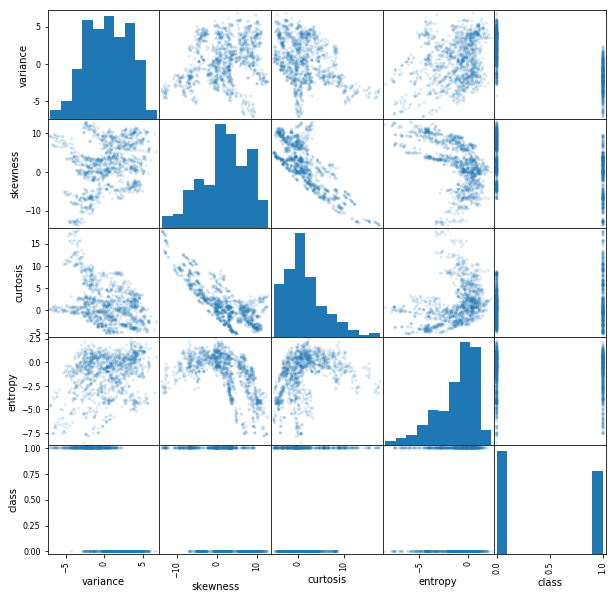

In [23]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .15, figsize = (10, 10))
plt.show()

In [24]:
data.corr()

,variance,skewness,curtosis,entropy,class
variance,1.000000,0.263333,-0.380358,0.276666,-0.724655
skewness,0.263333,1.000000,-0.786729,-0.526896,-0.444281
curtosis,-0.380358,-0.786729,1.000000,0.319219,0.155346
entropy,0.276666,-0.526896,0.319219,1.000000,-0.023200
class,-0.724655,-0.444281,0.155346,-0.023200,1.000000


**Интересна зависимость ассиметрии (skewness) от эксцесса (curtosis).**

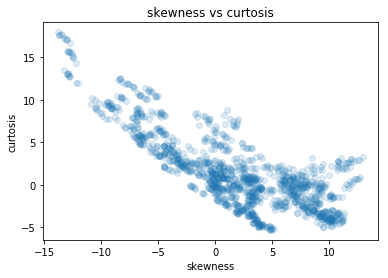

In [58]:
plt.plot(data['skewness'], data['curtosis'], 'o', alpha = 0.15)
plt.xlabel('skewness')
plt.ylabel('curtosis')
plt.title('skewness vs curtosis')
plt.show()

**Видим, что данная зависимость близка к обратно пропорциональной.**

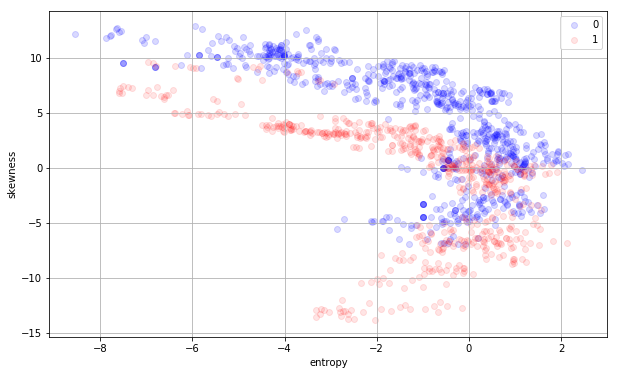

In [41]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['class'] == 0]['entropy'],
            data[data['class'] == 0]['skewness'],
            alpha = 0.15,
            label = '0',
            color = 'b')

plt.scatter(data[data['class'] == 1]['entropy'],
            data[data['class'] == 1]['skewness'],
            alpha = 0.1,
            label = '1',
            color = 'r')

plt.xlabel('entropy')
#plt.xticks(range(2))
#plt.xlim(0, 1)
plt.ylabel('skewness')
plt.legend()
plt.grid()
plt.show()

**Видим, что при одинаковом значении энтропии ассиметрия снимков подлинных банкнот в среднем выше.**

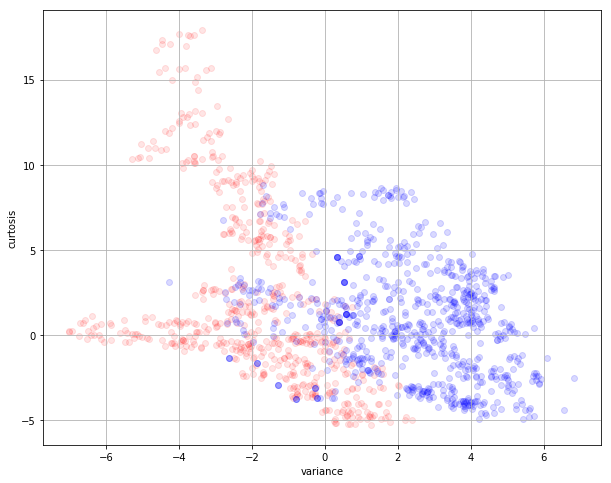

In [60]:
plt.figure(figsize = (10, 8))

plt.scatter(data[data['class'] == 1]['variance'],
            data[data['class'] == 1]['curtosis'],
            alpha = 0.1,
            label = 1,
            color = 'r')

plt.scatter(data[data['class'] == 0]['variance'],
            data[data['class'] == 0]['curtosis'],
            alpha = 0.15,
            label = 0,
            color = 'b')

plt.xlabel('variance')
plt.ylabel('curtosis')
plt.grid()
plt.show()

**Видим, что дисперсия подлинных снимков в среднем выше.**

## Подготовка данных:

**Первые четыре признака являются числовыми и имеют вещественный тип данных:**

In [8]:
data['variance'].dtype.name
data['skewness'].dtype.name
data['curtosis'].dtype.name
data['entropy'].dtype.name

'float64'

**Последний признак является бинарным и имеет целый тип:**

In [10]:
data['class'].dtype.name

'int64'

**Таким образом, категориальных небинарных признаков нет.**

In [12]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

[]
['variance', 'skewness', 'curtosis', 'entropy', 'class']


### Обработка пропущенных значений:

**Заменяем пропущенные данные медианными значениями.**

In [13]:
data.median(axis = 0)

variance    0.49571
skewness    2.31340
curtosis    0.61663
entropy    -0.58665
class       0.00000
dtype: float64

In [14]:
data = data.fillna(data.median(axis = 0), axis = 0)

In [16]:
data[numerical_columns].count(axis = 0)

variance    1371
skewness    1371
curtosis    1371
entropy     1371
class       1371
dtype: int64

### Векторизация данных:

**Поскольку категориальных признаков нет, векторизацию проводить не требуется.**

### Нормализация количественных признаков:

**Сначала отделяем последний столбец таблицы:**

In [17]:
data_numerical = data[numerical_columns]

In [18]:
data_numerical.describe()

,variance,skewness,curtosis,entropy,class
count,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000
mean,0.431410,1.917434,1.400694,-1.192200,0.444931
std,2.842494,5.868359,4.310105,2.101683,0.497139
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.774700,-1.711300,-1.553350,-2.417000,0.000000
50%,0.495710,2.313400,0.616630,-0.586650,0.000000
75%,2.814650,6.813100,3.181600,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [19]:
data_class = data['class']

In [20]:
data_numerical = data_numerical.drop(('class'), axis = 1)

In [21]:
data_numerical.describe()

,variance,skewness,curtosis,entropy
count,1371.000000,1371.000000,1371.000000,1371.000000
mean,0.431410,1.917434,1.400694,-1.192200
std,2.842494,5.868359,4.310105,2.101683
min,-7.042100,-13.773100,-5.286100,-8.548200
25%,-1.774700,-1.711300,-1.553350,-2.417000
50%,0.495710,2.313400,0.616630,-0.586650
75%,2.814650,6.813100,3.181600,0.394810
max,6.824800,12.951600,17.927400,2.449500


**Каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению:**

In [22]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [23]:
data_numerical.describe()

,variance,skewness,curtosis,entropy
count,1.371000e+03,1.371000e+03,1.371000e+03,1.371000e+03
mean,-2.859573e-19,1.161670e-17,2.307271e-17,-1.978293e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.629208e+00,-2.673752e+00,-1.551423e+00,-3.500052e+00
25%,-7.761176e-01,-6.183559e-01,-6.853764e-01,-5.827711e-01
50%,2.262096e-02,6.747470e-02,-1.819130e-01,2.881260e-01
75%,8.384326e-01,8.342479e-01,4.131932e-01,7.551136e-01
max,2.249218e+00,1.880281e+00,3.834409e+00,1.732754e+00


### Задание X и y:

In [24]:
X = data.drop(('class'), axis = 1)

In [25]:
y = data['class']
feature_names = X.columns

### Получаем обучающие и тестовые выборки:

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)


(959, 412)


In [28]:
959 + 412

1371

## Применение алгорима $k$ ближайших соседей:

In [41]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 25)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=25, p=2,
           weights='uniform')

In [42]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=25, p=2,
           weights='uniform')

In [43]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

(0.0083420229405630868, 0.0048543689320388345)


**Другой способ вычисления ошибки:**

In [44]:
err_test = 1 - knn.score(X_test, y_test)

In [48]:
err_test

0.0048543689320388328

In [51]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[227   2]
 [  0 183]]


### Подбор параметров:

При $k=1$ ошибка на тестовой выборке равна 0.

In [52]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

(0.0, 1)


In [54]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

(0.0, 0.0024271844660194173)


Возможно, дело в том, что входные данные упорядочены по классу.